In [35]:
import pandas as pd
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
import sqlite3

In [3]:
def run_query(q):
    with sqlite3.connect('chinook.db') as conn:
        return pd.read_sql(q, conn)

In [4]:
def run_command(c):
    with sqlite3.connect('chinook.db') as conn:
        conn.isolation_level = None
        return conn.execute(c)

In [5]:
def show_tables():
    q = 'SELECT name,type FROM sqlite_master WHERE type IN ("table","view");'
    return run_query(q)

In [6]:
show_tables()

,name,type
0,album,table
1,artist,table
2,customer,table
3,employee,table
4,genre,table
5,invoice,table
6,invoice_line,table
7,media_type,table
8,playlist,table
9,playlist_track,table


In [7]:
q = """
select 
    g.name as Genre,
    Count(il.track_id) as Anzahl
from invoice_line il 
inner join invoice i on i.invoice_id = il.invoice_id 
inner join track t on il.track_id = t.track_id 
inner join genre g on t.genre_id = g.genre_id
where i.billing_country = "USA"
group by g.name; 
"""

tabelle = run_query(q)

In [8]:
tabelle

,Genre,Anzahl
0,Alternative,35
1,Alternative & Punk,130
2,Blues,36
3,Classical,4
4,Easy Listening,13
5,Electronica/Dance,5
6,Heavy Metal,3
7,Hip Hop/Rap,20
8,Jazz,14
9,Latin,22


In [9]:
summe_tracks = sum(tabelle.Anzahl)
summe_tracks

1051

In [10]:
tabelle['Prozente %'] = tabelle.Anzahl/summe_tracks*100
#tabelle.drop('Prozente', axis=1)

In [11]:
tabelle = tabelle.sort_values('Anzahl')


In [12]:
tabelle = tabelle.set_index('Genre')

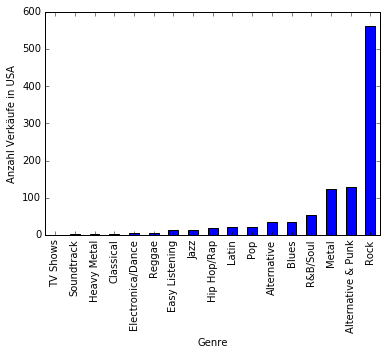

In [13]:
tabelle['Anzahl'].plot(kind='bar')
mt.pyplot.ylabel('Anzahl Verkäufe in USA')

Anhand der Grafik ist zusehen, dass Rock, Alternative und Punk sowie Metal sich am besten verkaufen. Es sollte das Album der Band "Red Tone" gekauft werden. Danach in der Rangfolge: "Slim Jim Bites", "Meteor and the Girls" and "Regal". Der Unterschied von Rock zu allen anderen ist jedoch signifikat, da darüber > 50% aller Umsätze generiert werden.

In [14]:
q_test = """

select 
    i.customer_id as Kunde,
    sum(i.total) as gesamt,
    e.employee_id as Angestellter,
    i.billing_country as Land
    
    
from invoice i
inner join customer c on i.customer_id = c.customer_id
inner join employee e on e.employee_id = c.support_rep_id
group by Kunde;

"""

In [15]:
tabelleB = run_query(q_test)

In [16]:
tabelleB

,Kunde,gesamt,Angestellter,Land
0,1,108.90,3,Brazil
1,2,82.17,5,Germany
2,3,99.99,3,Canada
3,4,72.27,4,Norway
4,5,144.54,4,Czech Republic
5,6,128.70,5,Czech Republic
6,7,69.30,5,Austria
7,8,60.39,4,Belgium
8,9,37.62,4,Denmark
9,10,60.39,4,Brazil


In [17]:
q = """
select 
    (e.first_name||' '|| e.last_name) as Angestellte, 
    e.hire_date as Einstellung,
    sum(zk.gesamt) as Umsatz,
    sum(zk.gesamt)/count(zk.Kunde) AS Umsatz_Kunde,
    sum(zk.gesamt)/(julianday('now') - julianday(e.hire_date)) as um_tag

from employee e

inner join (select 
    i.customer_id as Kunde,
    sum(i.total) as gesamt,
    e.employee_id as Angestellter,
    i.billing_country as Land
    
    
from invoice i
inner join customer c on i.customer_id = c.customer_id
inner join employee e on e.employee_id = c.support_rep_id
group by Kunde) as zk on zk.Angestellter = e.employee_id

group by Angestellte;

"""
tabelleA = run_query(q)

In [25]:
tabelleA

,Angestellte,Einstellung,Umsatz,Umsatz_Kunde,um_tag
0,Jane Peacock,2017-04-01 00:00:00,1731.51,82.452857,4.210231
1,Margaret Park,2017-05-03 00:00:00,1584.00,79.200000,4.176527
2,Steve Johnson,2017-10-17 00:00:00,1393.92,77.440000,6.566964


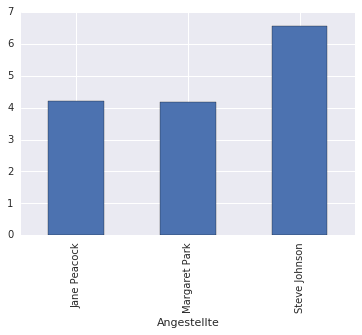

In [31]:
tabelleA.plot.bar("Angestellte", "um_tag", legend = False)

Die Umsätze können vor dem Hintergrund der Betriebszugehörigkiet ausgewertet werden. Dann wird deutlich, dass der zuletzt eingestellte Kundenbetreuer den höchsten Umsatz pro Tag hat, wenn auch den niedrigsten Umsatz pro Kunde.

In [19]:
q_kunden = """
create view sum_av_kunde as
select 
    c.customer_id,
    sum(i.total) as umsatz,
    c.country,
    avg(i.total) as mittel
from customer c
inner join invoice i on c.customer_id = i.customer_id
group by c.customer_id;   


"""

In [20]:
q_lander = """
create view sum_av_land as
select
    country as Land,
    sum(umsatz) as Summe_gesamt, 
    avg(umsatz) as Umsatz_Kunde,
    avg(mittel) as Umsatz_Order,
    count(customer_id) as Anzahl_Kunden
from sum_av_kunde
group by country
order by Anzahl_Kunden desc;


"""

In [ ]:
run_query(q_lander)

In [23]:


sales_by_country = '''
WITH country_or_other AS
    (
     SELECT
       CASE
           WHEN (
                 SELECT count(*)
                 FROM customer
                 where country = c.country
                ) = 1 THEN "Other"
           ELSE c.country
       END AS country,
       c.customer_id,
       il.*
     FROM invoice_line il
     INNER JOIN invoice i ON i.invoice_id = il.invoice_id
     INNER JOIN customer c ON c.customer_id = i.customer_id
    )

SELECT
    country,
    customers,
    total_sales,
    average_order,
    customer_lifetime_value
FROM
    (
    SELECT
        country,
        count(distinct customer_id) customers,
        SUM(unit_price) total_sales,
        SUM(unit_price) / count(distinct customer_id) customer_lifetime_value,
        SUM(unit_price) / count(distinct invoice_id) average_order,
        CASE
            WHEN country = "Other" THEN 1
            ELSE 0
        END AS sort
    FROM country_or_other
    GROUP BY country
    ORDER BY sort ASC, total_sales DESC
    );
'''

TabelleSC= run_query(sales_by_country)

In [24]:
TabelleSC

,country,customers,total_sales,average_order,customer_lifetime_value
0,USA,13,1040.49,7.942672,80.037692
1,Canada,8,535.59,7.047237,66.948750
2,Brazil,5,427.68,7.011148,85.536000
3,France,5,389.07,7.781400,77.814000
4,Germany,4,334.62,8.161463,83.655000
5,Czech Republic,2,273.24,9.108000,136.620000
6,United Kingdom,3,245.52,8.768571,81.840000
7,Portugal,2,185.13,6.383793,92.565000
8,India,2,183.15,8.721429,91.575000
9,Other,15,1094.94,7.448571,72.996000


In [39]:
avg_or = np.mean(TabelleSC.average_order)

In [40]:
TabelleSC['Abweichung_Order'] = TabelleSC.average_order - avg_or

In [50]:
left = len(TabelleSC)
height=TabelleSC['Abweichung_Order'].values
print (height)

[ 0.10524335 -0.79019157 -0.82628087 -0.05602841  0.32403501  1.27057159
  0.93114302 -1.45363531  0.88400016 -0.38885698]


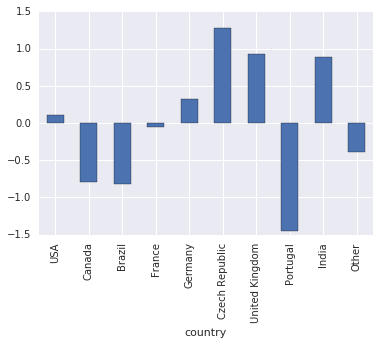

In [53]:
TabelleSC.plot.bar('country', 'Abweichung_Order', legend = False)

In [54]:
avg_sa = np.mean(TabelleSC.total_sales)

In [56]:
TabelleSC['Abweichung_Sales'] = TabelleSC.total_sales - avg_sa

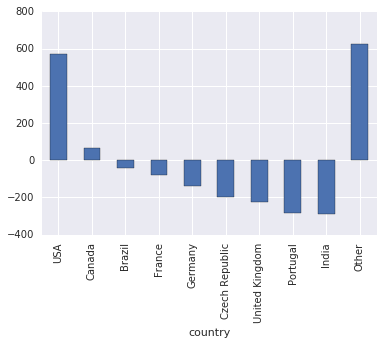

In [58]:
TabelleSC.plot.bar('country', 'Abweichung_Sales', legend = False)

Tschechien und Grossbritannien sowie Indien, haben größere Abweichungen (überdurchschnittlich) von der durchschnittlichen Order und von den Verkäufen (unterdurchschnittlichen).